<a href="https://colab.research.google.com/github/amirtare/The-Sparks-Foundation-Tasks/blob/main/Task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction using Unsupervised ML
in this task, I'll try to predict the optimum number of clusters
and represent it visually

#Important Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


#Load data

In [2]:
Iris = datasets.load_iris()
data = pd.DataFrame(Iris.data, columns=Iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Elbow method
we will use elbow method to select K

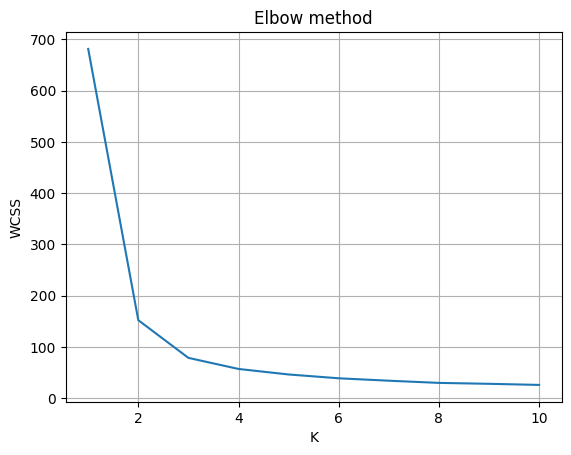

In [3]:
x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmean = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
  kmean.fit(x)
  wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid()
plt.show()





**so we will chose K=3**







#Tranning

In [4]:
K=3
kmean = KMeans(n_clusters=K,max_iter=300,n_init=10,random_state=0)
y = kmean.fit_predict(x)



#Visualising the clusters

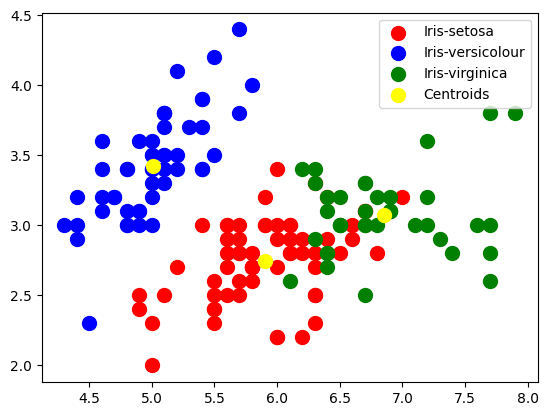

In [5]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y== 0, 0], x[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()